### imports & definitions

In [15]:
import h5py
import nd2reader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

def update_frame(val):
    """
    Update the displayed frame based on the slider's position.
    """
    frame_index = int(slider.val)
    frame = dataset[frame_index, :, :]
    img.set_data(frame)
    fig.canvas.draw_idle()

def visualize_frames_with_slider(file_path, dataset_name):
    """
    Visualizes frames from a specified dataset in an HDF5 file with a slider to browse through them.
    """
    global dataset, img, slider, fig

    with h5py.File(file_path, 'r') as hdf:
        if dataset_name in hdf:
            dataset = hdf[dataset_name]

            # Initial frame
            frame_index = 0
            initial_frame = dataset[frame_index, :, :]

            # Setting up the plot
            fig, ax = plt.subplots()
            plt.subplots_adjust(left=0.1, bottom=0.25)
            img = ax.imshow(initial_frame, cmap='gray')
            ax.set_title(f'Frame {frame_index} from {dataset_name}')

            # Slider
            ax_slider = plt.axes([0.1, 0.1, 0.65, 0.03])
            slider = Slider(ax_slider, 'Frame', 0, dataset.shape[0] - 1, valinit=frame_index, valfmt='%0.0f')

            # Update the frame when the slider is moved
            slider.on_changed(update_frame)

            plt.show()
        else:
            print(f"Dataset '{dataset_name}' not found in the file.")

def visualize_frames_with_slider_jupyter(file_path, dataset_name):
    """
    Visualizes frames from a specified dataset in an HDF5 file with a slider to browse through them in Jupyter Notebook.
    """

    # Function to read a specific frame from the dataset
    def read_frame(file_path, dataset_name, frame_index):
        with h5py.File(file_path, 'r') as hdf:
            if dataset_name in hdf:
                dataset = hdf[dataset_name]
                frame = dataset[frame_index, :, :]
                return frame
            else:
                print(f"Dataset '{dataset_name}' not found in the file.")
                return None

    # Function to update and display the image based on the slider
    def update_frame(change):
        frame_index = change['new']
        frame = read_frame(file_path, dataset_name, frame_index)
        if frame is not None:
            with out:
                clear_output(wait=True)
                plt.imshow(frame, cmap='gray')
                plt.title(f'Frame {frame_index} from {dataset_name}')
                plt.show()

    # Get the number of frames in the dataset
    with h5py.File(file_path, 'r') as hdf:
        if dataset_name in hdf:
            num_frames = hdf[dataset_name].shape[0]
        else:
            raise ValueError(f"Dataset '{dataset_name}' not found in the file.")

    # Initial frame setup
    initial_frame = read_frame(file_path, dataset_name, 0)

    # Slider setup
    slider = widgets.IntSlider(
        min=0, 
        max=num_frames - 1, 
        step=1, 
        value=0, 
        description='Frame'
    )
    slider.observe(update_frame, names='value')

    # Output widget to display images
    out = widgets.Output()

    # Display the initial frame
    with out:
        plt.imshow(initial_frame, cmap='gray')
        plt.title('Frame 0 from ' + dataset_name)
        plt.show()

    # Display everything (slider and image output)
    display(widgets.VBox([slider, out]))
            
def extract_metadata(nd2_file_path):
    """
    Extracts metadata from a .nd2 file.

    :param nd2_file_path: Path to the .nd2 file
    :return: Dictionary containing metadata
    """
    with nd2reader.ND2Reader(nd2_file_path) as images:
        metadata = images.metadata
    return metadata

def print_metadata(obj, prefix=''):
    """
    Recursively prints the metadata of the HDF5 object (group/dataset).
    """
    print(f"{prefix}{obj.name}")
    for key, val in obj.attrs.items():
        print(f"{prefix}  Metadata: {key} = {val}")

    if isinstance(obj, h5py.Group):
        for key in obj:
            print_metadata(obj[key], prefix + '  ')


### nd2 views

<FramesSequenceND>
Axes: 4
Axis 'x' size: 322
Axis 'y' size: 212
Axis 'c' size: 2
Axis 't' size: 3200
Pixel Datatype: <class 'numpy.float64'>
3200


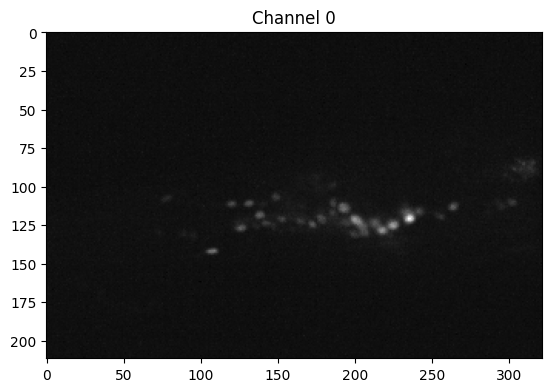

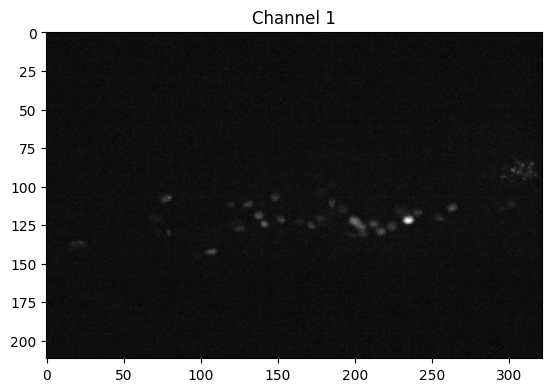

In [2]:
# Example usage of the function
nd2_file_path = 'C:\\Users\\Kevin\\Documents\\data\\2022-06-14-03.nd2'  # Replace with the path to your .nd2 file
print(nd2reader.ND2Reader(nd2_file_path))
print(nd2reader.ND2Reader(nd2_file_path).metadata['num_frames'])
with nd2reader.ND2Reader(nd2_file_path) as images:
    num_channels = images.sizes['c']
    for channel in range(num_channels):
        # Accessing each channel
        channel_image = images.get_frame_2D(c=channel, t=500)

        # Display or process the channel image here
        # For demonstration, let's just show the image using matplotlib
        plt.imshow(channel_image, cmap='gray')
        plt.title(f'Channel {channel}')
        plt.show()

### nir views

In [22]:
file_path = 'C:\\Users\\Kevin\\Documents\\data\\2022-06-14-01.h5'
with h5py.File(file_path, 'r') as hdf:
    dataset = 'img_nir'
    if dataset in hdf:
        data = hdf[dataset]
        print(data)
        print(hdf['img_metadata']['img_timestamp'])
    else:
        print(f"Dataset {dataset} not found in the file.")

# Visualize frames with a slider
visualize_frames_with_slider_jupyter(file_path, 'img_nir')

<HDF5 dataset "img_nir": shape (20173, 732, 968), type "|u1">
<HDF5 dataset "img_timestamp": shape (40345,), type "<i8">
